Bayesian Decision Theory Classification Accuracy: 83.33 %


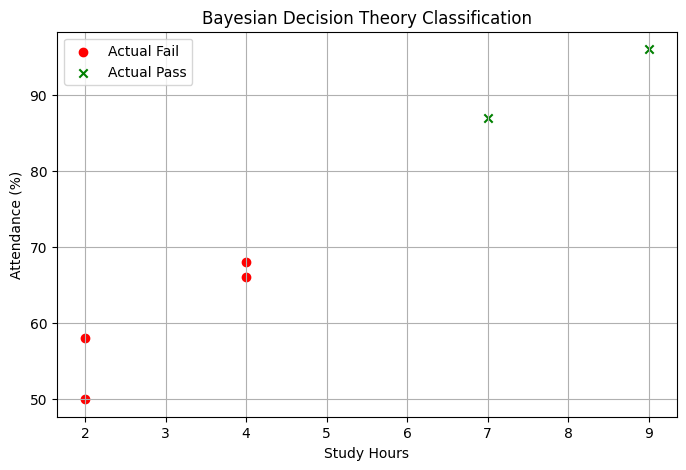

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv("students.csv")
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mean0 = np.mean(X_train[y_train == 0], axis=0)
mean1 = np.mean(X_train[y_train == 1], axis=0)
cov0 = np.cov(X_train[y_train == 0], rowvar=False)
cov1 = np.cov(X_train[y_train == 1], rowvar=False)
prior0 = np.mean(y_train == 0)
prior1 = np.mean(y_train == 1)

def gaussian_pdf(x, mean, cov):
    size = len(x)
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    norm_const = 1.0 / (np.power((2 * np.pi), size / 2) * np.sqrt(det))
    x_mu = x - mean
    result = np.exp(-0.5 * (x_mu @ inv @ x_mu.T))
    return norm_const * result

correct = 0
predicted_labels = []
for x, true_class in zip(X_test, y_test):
    p0 = gaussian_pdf(x, mean0, cov0) * prior0
    p1 = gaussian_pdf(x, mean1, cov1) * prior1
    predicted = 0 if p0 > p1 else 1
    predicted_labels.append(predicted)
    if predicted == true_class:
        correct += 1

accuracy = correct / len(y_test)
print("Bayesian Decision Theory Classification Accuracy:", round(accuracy * 100, 2), "%")

plt.figure(figsize=(8,5))
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], color='red', label='Actual Fail')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], color='green', label='Actual Pass', marker='x')
plt.title("Bayesian Decision Theory Classification")
plt.xlabel("Study Hours")
plt.ylabel("Attendance (%)")
plt.legend()
plt.grid(True)
plt.show()
